In [374]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # used for plot interactive graph.
import plotly.offline as py
from ast import literal_eval

import warnings 
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns',100)

In [375]:
Movies = pd.read_csv('tmdb_5000_movies.csv')

Diamo un'occhiata al dataset

In [376]:
print("Dataset has {} rows and {} columns".format(Movies.shape[0],Movies.shape[1]))

Dataset has 4803 rows and 20 columns


In [377]:
Movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Notiamo che alcuni attributi hanno formato Json, poco comodo da utilizzare,in seguito li convertiremo in liste

In [378]:
#Vediamo i tipi dei vari attributi
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Notiamo che alcuni attributi hanno parecchi valori nulli,(ad esempio 'Homepage' e 'Tagline'),vediamo se possiamo dropparli oppure sono utili

In [379]:
#Vediamo dati mancanti
Movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Homepage e spoken_languages sono attributi che non intendiamo usare per la nostra analisi, mentre original_title é inutile perché abbiamo già un campo title, quindi lo escludiamo perché risulterebbe ridondante

In [380]:
Movies.drop(['homepage','spoken_languages','original_title'],inplace=True,axis='columns')

Ora convertiamo i campi Json,di cui parlavamo prima,in liste

In [381]:
#Funzioni usate per convertire campi da formato json a liste
def get_name(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names
    return []

def get_ISO(x):
    if isinstance(x, list):
        isos = [i['iso_3166_1'] for i in x]
        return isos
    return []

In [382]:
feat_to_manage = ['genres','keywords','production_countries','production_companies']
for f in feat_to_manage:
    Movies[f] = Movies[f].apply(literal_eval)

In [383]:
#Turn genres into list
Movies['genres'] = Movies['genres'].apply(get_name)
#Turn prod_countries into list
Movies['production_countries'] = Movies['production_countries'].apply(get_ISO)
#Turn prod_companies into list
Movies['production_companies'] = Movies['production_companies'].apply(get_name)
#Turn keywords into list
Movies['keywords'] = Movies['keywords'].apply(get_name)

Movies.head()

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[US, GB]",2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[US],2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[GB, US]",2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[US],2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[US],2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124


Controlliamo che il budget abbia valori sensati(ad esempio film con budget 0 non sono ammessi)

## Budget ##

In [384]:
print(Movies['budget'].describe())

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64


Abbiamo alcuni film che sono in Post-Production e altri Rumored,non vogliamo lavorare con questi,quindi li droppiamo,tanto rappresentano una grande minoranza(all'incirca una decina)

In [385]:
Movies = Movies.query('status == "Released"')

In [386]:
Movies['budget'].describe()

count    4.795000e+03
mean     2.909267e+07
std      4.073962e+07
min      0.000000e+00
25%      8.000000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

Notiamo ora che il budget minimo é 0,cosa non ammissibile,quindi cerchiamo un range che abbia senso(ad esempio teniamo tutti i film che hanno almeno budget >= 10000)

In [387]:
for row in Movies.index:
    if Movies.loc[row,'budget'] < 10000:
        Movies.loc[row,'budget'] = np.nan
        
Movies['budget'].describe()

count    3.728000e+03
mean     3.741935e+07
std      4.269910e+07
min      1.000000e+04
25%      8.975000e+06
50%      2.400000e+07
75%      5.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

Ora che abbiamo un budget minimo,suddividiamo i budget in 3 categorie,che verranno mappate a 1,2,3 in base ai range:
- Low: 1.000000e+04 <= x <= 8.975000e+06 (1)
- Medium: 8.975000e+06 < x <= 5.000000e+07 (2)
- High: 5.000000e+07 < x <= 3.800000e+08 (3)


In [388]:
bins = [1.000000e+04, 8.975000e+06, 5.000000e+07, 3.800000e+08]
labels=[1,2,3]
Movies['budget_class'] = pd.cut(Movies['budget'],bins=bins,labels=labels)


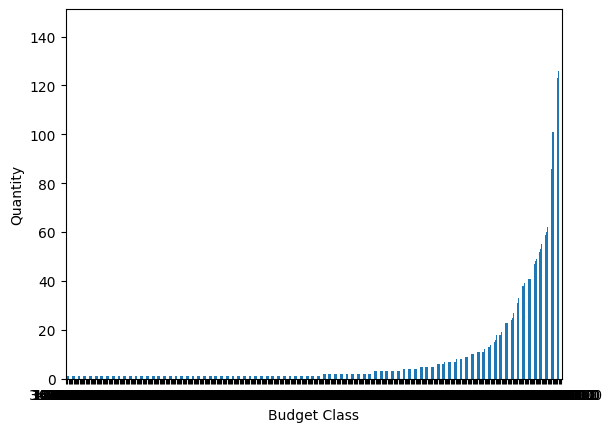

In [389]:
ax = Movies['budget'].value_counts().sort_values(ascending=True).plot(kind='bar')
ax.set_xlabel("Budget Class")
ax.set_ylabel("Quantity")
plt.xticks(rotation="horizontal")
plt.show()

Possiamo osservare che vi sono molti film con un budget di classe media,direi un risultato coerente

## Revenues ##

In [390]:
print('Movies with 0$ revenues: ',Movies[Movies['revenue'] == 0].shape[0])

Movies with 0$ revenues:  1420


Mettiamo anche questi a Nan

In [391]:
for row in Movies.index:
    if (Movies.loc[row, 'revenue'] == 0):
        Movies.loc[row, 'revenue'] = np.nan

In [392]:
Movies[['budget','revenue']].isna().sum()

budget     1067
revenue    1420
dtype: int64

Riteniamo importante che la media dei voti sia pesata con il numero di voti che la generano, per fare questo usiamo la formula consigliata dal sito IMBD e togliamo le due colonne vote_average e vote_count per unirle in una che le metta insieme

## Score ##

Vogliamo eliminare quei film che hanno una percentuale di vote_count(voti dati) bassa,perché andrebbe a creare degli squilibri,
visto che un film votato 8,però da 5 persone,non é affidabile,ad esempio

In [393]:
#Rating pesato
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [394]:
#TODO: potremmo anche fare questo lavoro sul dataset di partenza aggiungendo una colonna, metà avranno nan
C= Movies['vote_average'].mean()
C
m= Movies['vote_count'].quantile(0.5)

for i in Movies.index:
    if Movies.loc[i,'vote_count'] <= m:
        Movies.loc[i,'vote_count'] = np.nan
    else:
        pass

    
q_movies = Movies[['id','vote_count','vote_average']]

In [395]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

q_movies.drop(['vote_average','vote_count'],inplace=True,axis='columns')

#Merge dei dataframe,ora Movies ha anche la colonna Score",
Movies = pd.merge(Movies,q_movies,on='id',how='inner')

Movies.shape

(4795, 19)

Abbiamo eliminato dei film (in q_movies), quelli con troppi pochi voti per poter essere presi in considerazione per quanto riguarda il voto ricevuto e abbiamo poi riunito i due dataframe,cosi ora Movies ha anche la colonna score

## Profitti ##

Misuriamo i ricavi rispetto al budget tramite una funzione,e aggiungiamo una nuova colonna chiamata 'profit_perc' contente i risultati

In [396]:
def calculate_profit_perc(x):
    if (x.revenue>0) and (x.budget>0):
        return ((x.revenue-x.budget)/x.budget)*100
    

In [397]:
Movies = Movies.assign(profit_perc = lambda x: x.budget)
for row in Movies.index:
    Movies.loc[row,'profit_perc'] =  calculate_profit_perc(Movies.loc[row])

Definiamo funzione che dato un genere calcola la media dei profitti dei film che lo contengono

In [398]:
temp = Movies
temp.dropna(axis=0,inplace=True)

In [399]:
#Quanti film ci sono per genere con profitto diverso da Nan
def films_per_genres(genre):
    sum = 0
    count = 0
    for row in temp.index:
        if (genre in temp.loc[row, 'genres'] and (temp.loc[row,'profit_perc'] != np.nan)):
            count+=1
    return count


#Profitto per genere
def genre_average_profits(genre):
    sum = 0
    count = 0
    for row in temp.index:
        if (genre in temp.loc[row, 'genres'] and (temp.loc[row,'profit_perc'] != np.nan)):
            sum += temp.loc[row, 'profit_perc']
            count+=1
    return sum/count



In [400]:
genres=[]
for row in temp.index:
    _gen = temp.loc[row,'genres']
    for g in _gen:
        if g not in genres:
            genres.append(g)

profits=[]
for g in genres:
    profits.append(genre_average_profits(g))
            
print("Profitto associato ad ogni genere:")
for i in range(0,len(genres)):
    print('\t',genres[i], " has a mean profit of ", profits[i])

Profitto associato ad ogni genere:
	 Action  has a mean profit of  304.0197925073328
	 Adventure  has a mean profit of  410.4735995190337
	 Fantasy  has a mean profit of  333.67295828967104
	 Science Fiction  has a mean profit of  357.4043673286655
	 Crime  has a mean profit of  282.76597145297075
	 Drama  has a mean profit of  569.8323474101483
	 Thriller  has a mean profit of  561.0186645149466
	 Animation  has a mean profit of  649.5884284948968
	 Family  has a mean profit of  540.9222601790862
	 Western  has a mean profit of  637.414451302206
	 Comedy  has a mean profit of  504.77933325142254
	 Romance  has a mean profit of  536.4716202005993
	 Horror  has a mean profit of  8295.371058234967
	 Mystery  has a mean profit of  9041.087375998894
	 History  has a mean profit of  301.421669610385
	 War  has a mean profit of  468.05337132789015
	 Music  has a mean profit of  813.5654206579787
	 Documentary  has a mean profit of  6119.964841509324


Possiamo osservare come alcuni film abbiano un profitto molto alto,questo é dato dal fatto che ad esempio i film Horror hanno guadagnato molto e ve ne sono pochi all'interno del dataset,vediamo quindi le cardinalità di ogni genere

In [401]:
films = []
for el in genres:
    films.append(films_per_genres(el))
    
print("I generi presenti nel dataframe sono:")
for genre,film in zip(genres,films):
    print(genre,film)

I generi presenti nel dataframe sono:
Action 688
Adventure 519
Fantasy 277
Science Fiction 339
Crime 373
Drama 835
Thriller 687
Animation 143
Family 258
Western 31
Comedy 704
Romance 323
Horror 241
Mystery 195
History 77
War 73
Music 50
Documentary 9


I Documentari ad esempio sono molti pochi rispetto al totale dei film ed hanno un profitto percentuale pari a 6119 circa ,quindi per il motivo citato in precedenza sbilanciano di molto i conti. Possiamo permetterci di escluderli,visto che sono solamente 9

In [405]:
genres.remove(genres[-1])
profits.remove(profits[-1])

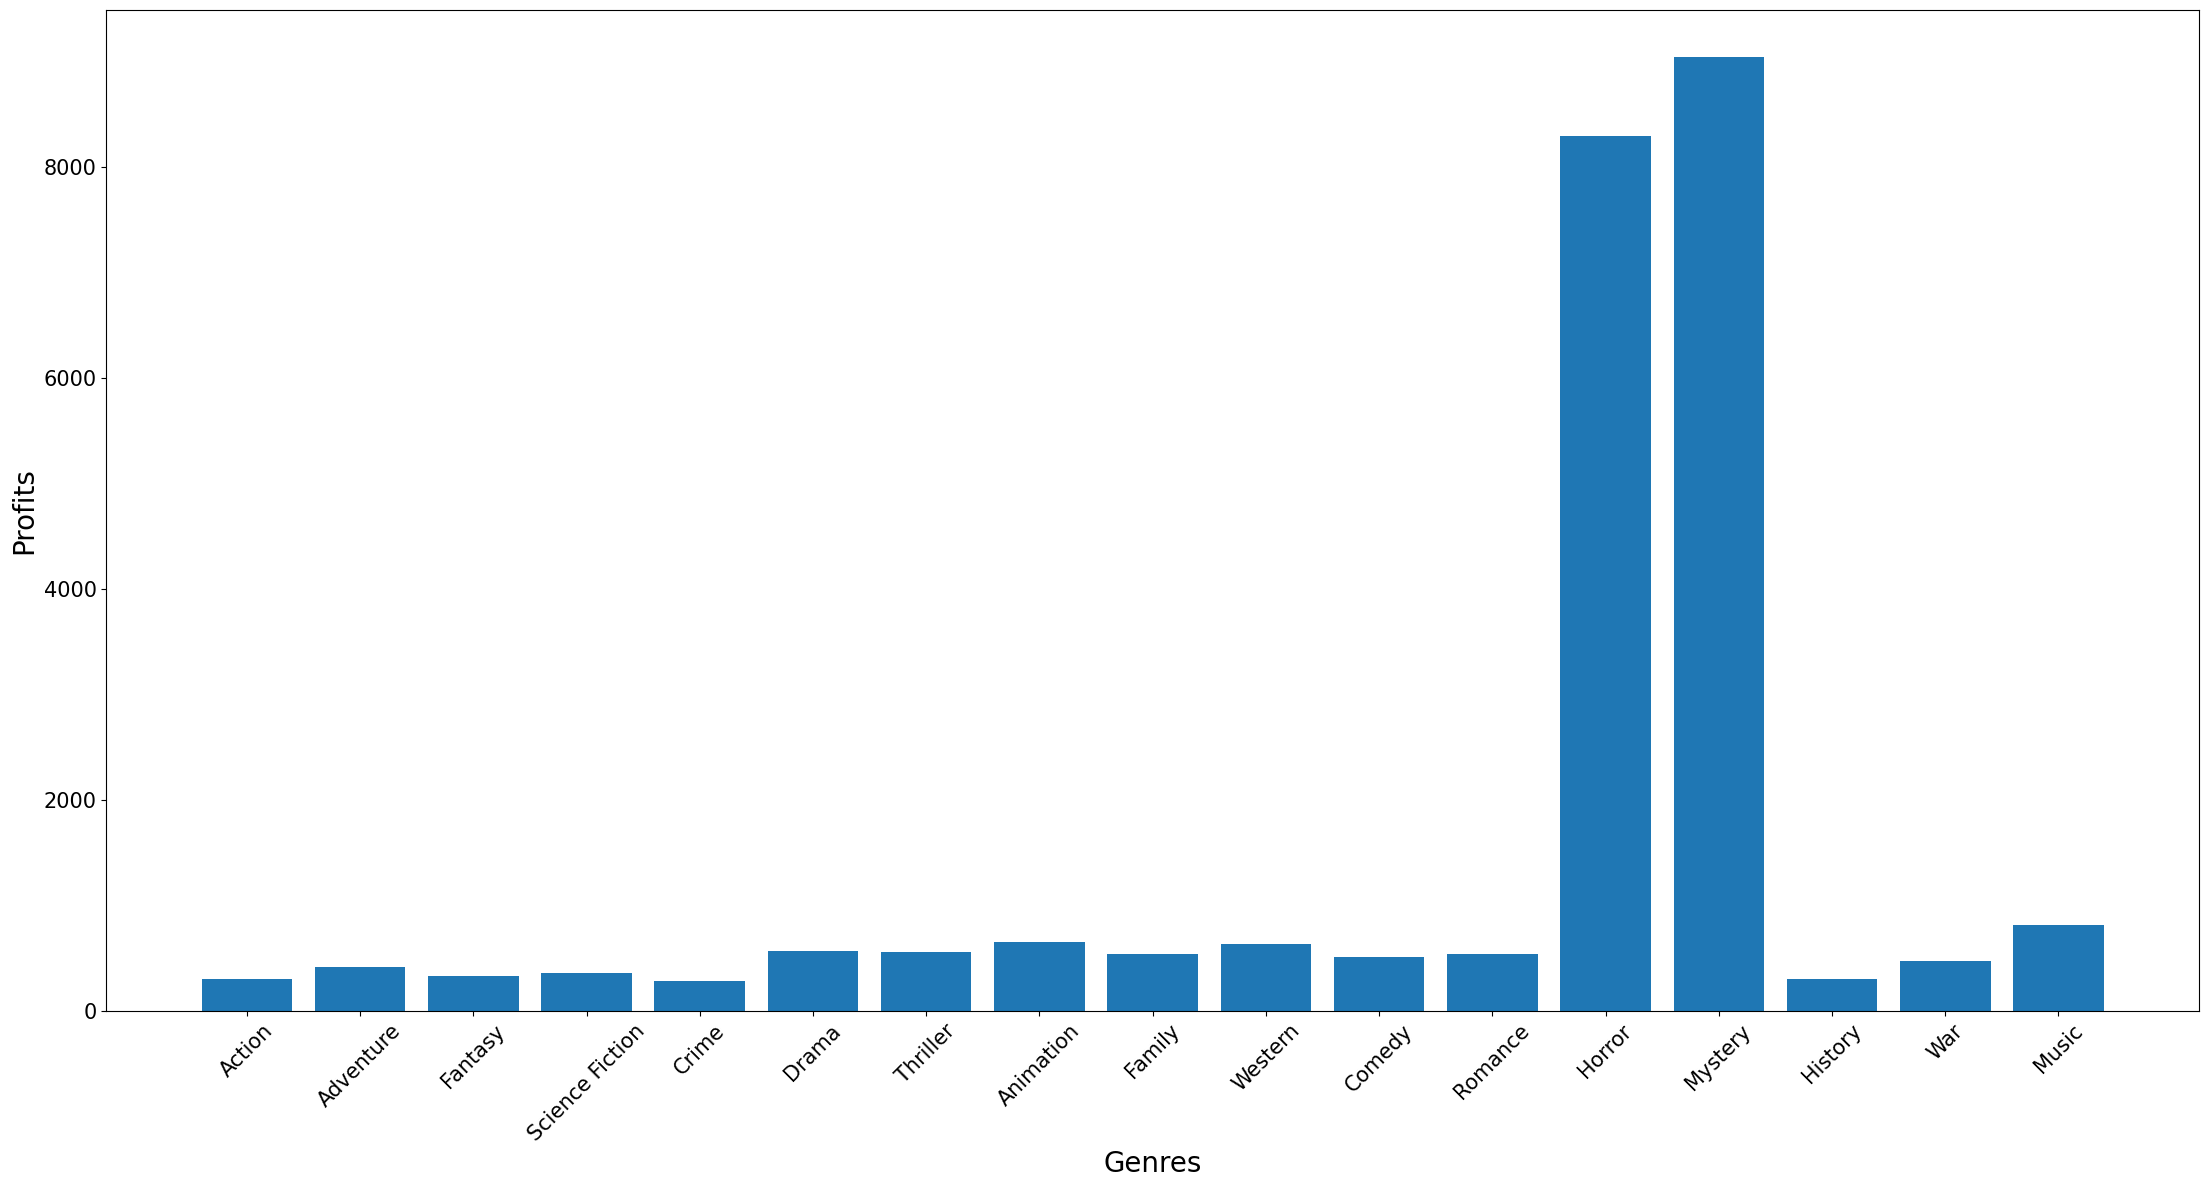

In [406]:
fig, ax = plt.subplots()
ax.bar(genres,profits)
fig.set_figwidth(27)
fig.set_figheight(13)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Genres", fontsize=20)
plt.ylabel("Profits", fontsize=20)
plt.show()

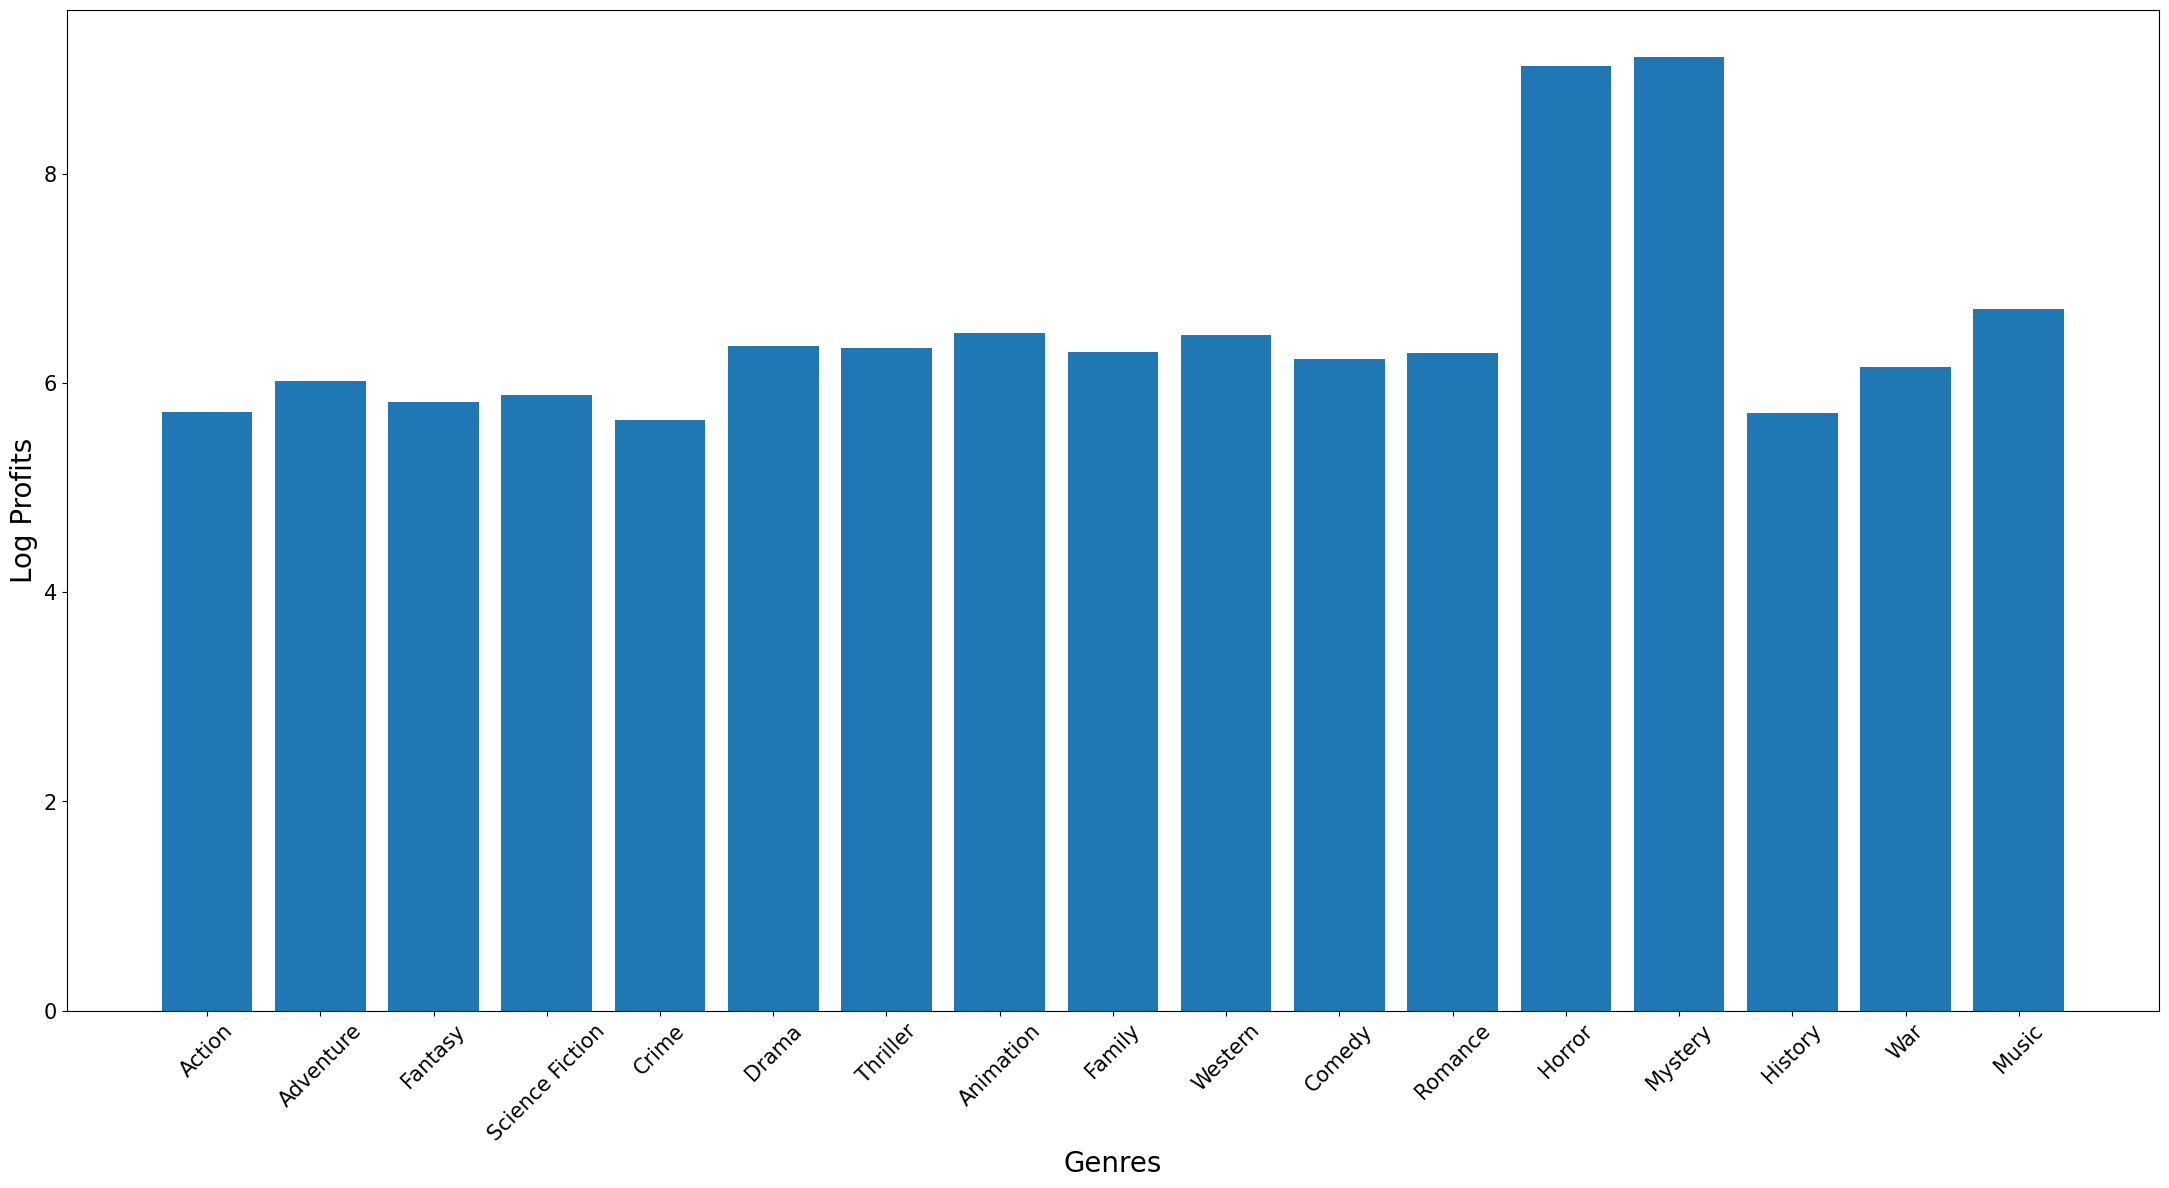

In [409]:
log_profit = np.log1p(profits)
fig, ax = plt.subplots()
ax.bar(genres,log_profit)
fig.set_figwidth(27)
fig.set_figheight(13)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Genres", fontsize=20)
plt.ylabel("Log Profits", fontsize=20)
plt.show()

In [417]:
print(pd.Series(log_profit).skew())


2.1713643514020107


## Keywords ##

In [439]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [440]:
vectorizer = TfidfVectorizer()
keyw = [' '.join(keyword) for keyword in temp['keywords']]

In [441]:
matrix = vectorizer.fit_transform(keyw)

In [442]:
df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
df['profits'] = temp['profit_perc']

In [443]:
correlations = df.corr()['profits'].sort_values(ascending=False)

In [448]:
print(len(keyw))

2134
